# Data visualization

### Loading required libraries


In [2]:
listPackages <- c('rgdal', 'ggplot2', 'ggmap', 'tidyverse', 'data.table', 
                  'scales', 'corrplot', 'gridExtra', 'treemap', 'RColorBrewer',
                 'rgdal')
newPackages <- listPackages[!(listPackages %in% installed.packages()[,'Package'])]
if(length(newPackages)) install.packages(newPackages)

rm(list = c('listPackages', 'newPackages'))

library(data.table)
library(tidyverse)
library(ggmap)
library(rgdal)
library(kableExtra)
library(scales)
library(corrplot)
library(gridExtra)
library(treemap)
library(RColorBrewer)

### Loading the data
We are going to load the clean dataset to visualize data structure.
As data is at state / lander level, it would be interesting to visualize it using maps. For that, it will be necessary download shapefile file with polygon configuration.

In [21]:
# Dataset
load(file = '../data/datasetCarsFinal')
# Download dataset from Dropbox
download.file(url = 'https://www.dropbox.com/s/xuupzr8rfpeekyc/VG250_1Jan2011_WGS84.zip?dl=1',
              destfile = '../data/VG250_1Jan2011_WGS84.zip')
unzip(zipfile = '../data/VG250_1Jan2011_WGS84.zip', exdir = '../data/Germany_shapefile/')
shapefileLander <- readOGR('../data/Germany_shapefile/', layer = 'VG250_Bundeslaender', encoding = 'ISO-8859-15')

### Setting up chart themes

In order to maintain the look and feel amongst charts, is very useful to create themes. With themes we can set up every part of the chart.

In [13]:
themeCharts <- ggplot2::theme(
  axis.title = element_text(colour = '#2D4471', size = 8),
  axis.text.x = element_text(colour = '#2D4471', size = 6, angle = 90, vjust = .5),
  axis.text.y = element_text(colour = '#2D4471', size = 6),
  axis.ticks = element_line(colour = '#2D4471'),
  axis.line = element_line(colour = '#2D4471'),
  legend.text = element_text(colour = '#2D4471', size = 6),
  legend.title = element_text(colour = '#2D4471', size = 6),
  panel.grid.major = element_line(colour = 'gray95', linetype = 1), #'#2D4471'
  plot.title = element_text(colour = '#2D4471', size = 12, face = 'bold'),
  plot.subtitle = element_text(colour = '#2D4471', size = 10),
  panel.background = element_rect(fill = '#FFFFFF'),
  legend.box.background = element_blank(),
  legend.key = element_blank()
  )

themeMaps <- theme(
  axis.title = element_blank(),
  axis.text.x = element_blank(),
  axis.text.y = element_blank(),
  axis.ticks = element_blank(),
  axis.line = element_blank(),
  legend.text = element_text(colour = '#2D4471', size = 10),
  legend.title = element_text(colour = '#2D4471', size = 12),
  plot.title = element_text(colour = '#2D4471', size = 18, face = 'bold'),
  plot.subtitle = element_text(colour = '#2D4471', size = 14),
  panel.background = element_rect(fill = '#FFFFFF'),
  legend.box.background = element_blank(),
  legend.key = element_blank(),
  panel.grid.major = element_blank(), 
  panel.grid.minor = element_blank()
)

### Charting numerical variables

Numerical and categorical variables require a different type of visualization

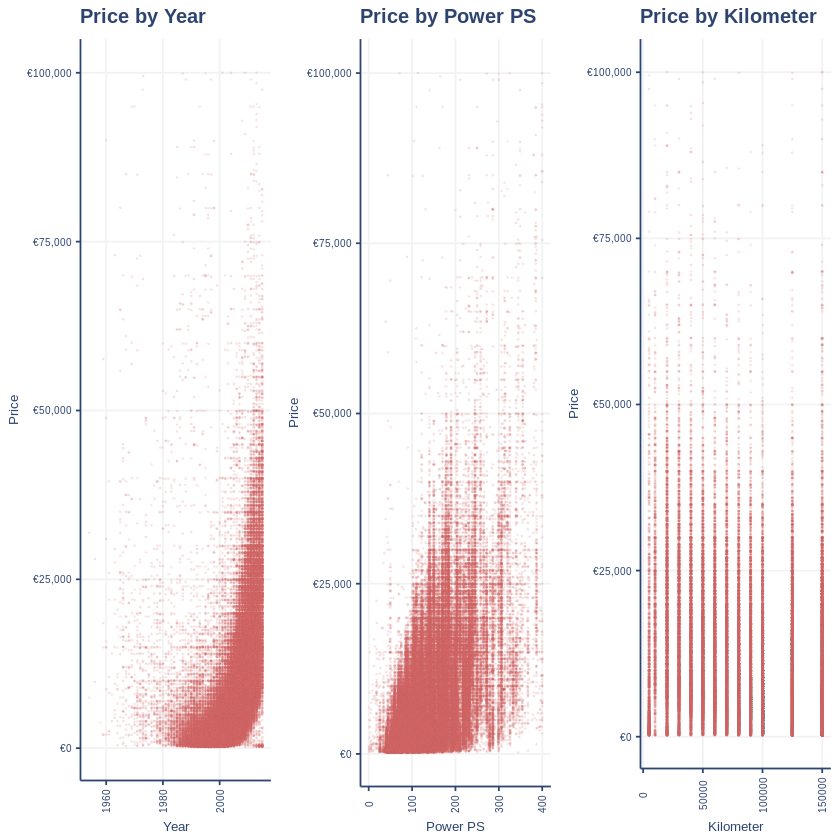

In [14]:
## Numerical variables ---------------------------------------------------------

## Using data frame variables as arguments in custom function
plotNumerical <- function(df, xvar, yvar, xName, yName, tit, subtit = NULL) {
  ggplot(df,
         aes_string(x = xvar, 
                    y= yvar)) +
    geom_point(alpha = 0.1, 
               color = '#D16666',
              size = 0.2) +
    scale_x_continuous(name = xName) +
    scale_y_continuous(name = yName, 
                       labels = scales::dollar_format(prefix = '€')) +
    labs(title = tit,
         subtitle = subtit) +
    themeCharts
}

g1 <- plotNumerical(df = datasetCarsFinal, xvar = 'yearOfRegistration', yvar = 'price', xName = 'Year', yName = 'Price', tit = 'Price by Year')
g2 <- plotNumerical(df = datasetCarsFinal, xvar = 'powerPS', yvar = 'price', xName = 'Power PS', yName = 'Price', tit = 'Price by Power PS')
g3 <- plotNumerical(df = datasetCarsFinal, xvar = 'kilometer', yvar = 'price', xName = 'Kilometer', yName = 'Price', tit = 'Price by Kilometer')

grid.arrange(g1, g2, g3, nrow = 1)

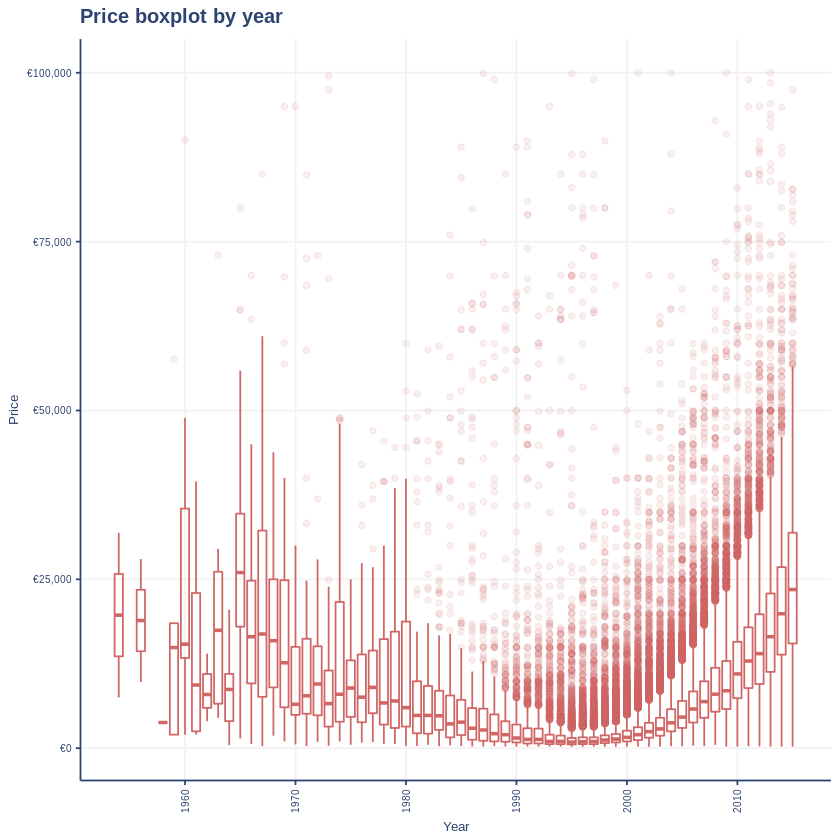

In [15]:
gBoxplot1 <- ggplot(data = datasetCarsFinal,
                    mapping = aes(x = yearOfRegistration,
                                  y = price,
                                  group = yearOfRegistration)) +
  geom_boxplot(alpha = 0.1, color = '#D16666') +
  labs(title = 'Price boxplot by year', subtitle = NULL) +
  scale_x_continuous(name = 'Year', breaks = seq(1950, 2020, by = 10)) +
  scale_y_continuous(name = 'Price', labels = scales::dollar_format(prefix = '€')) +
  themeCharts
gBoxplot1

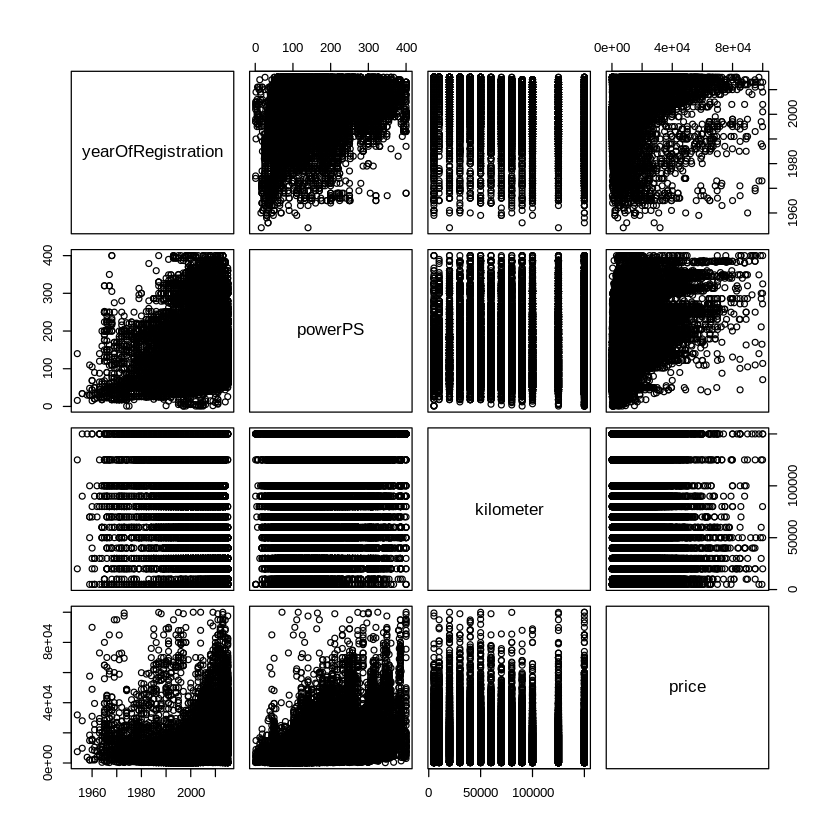

In [16]:
numericalCol <- c('yearOfRegistration', 'powerPS', 'kilometer', 'price')
datasetNumerical <- datasetCarsFinal[, ..numericalCol]

plot(datasetNumerical)

### Correlation chart

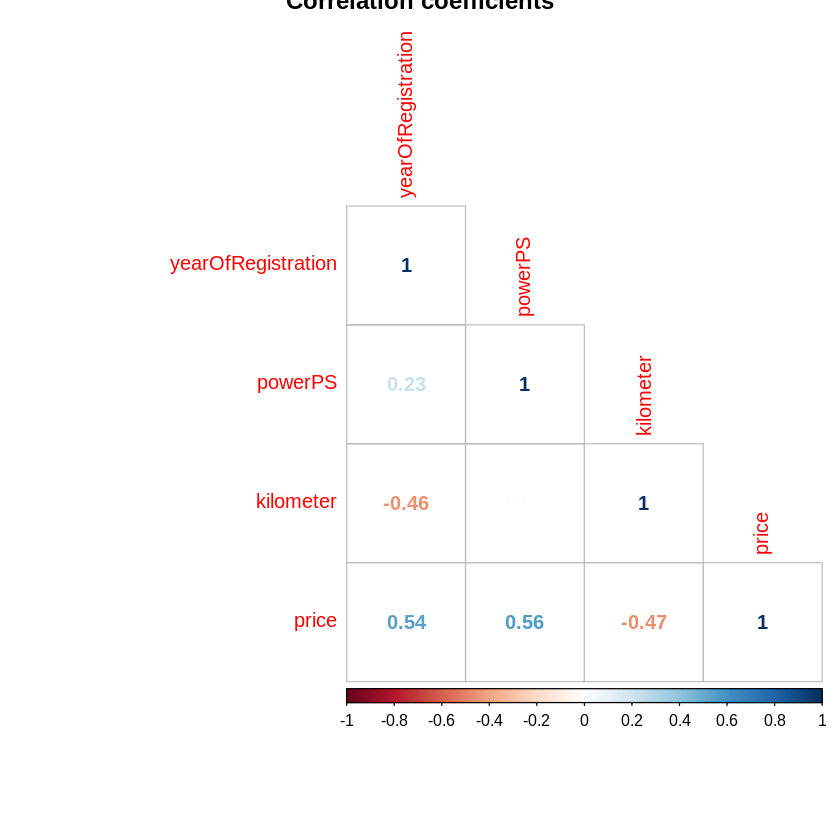

In [19]:
corrplot(cor(datasetNumerical), 
         method = 'number', 
         addCoef.col = T, 
         type = 'lower', 
         title = 'Correlation coefficients', 
         outline = T,
         tl.pos = 'ld',
         number.cex = 1)

### Charting categorical variables

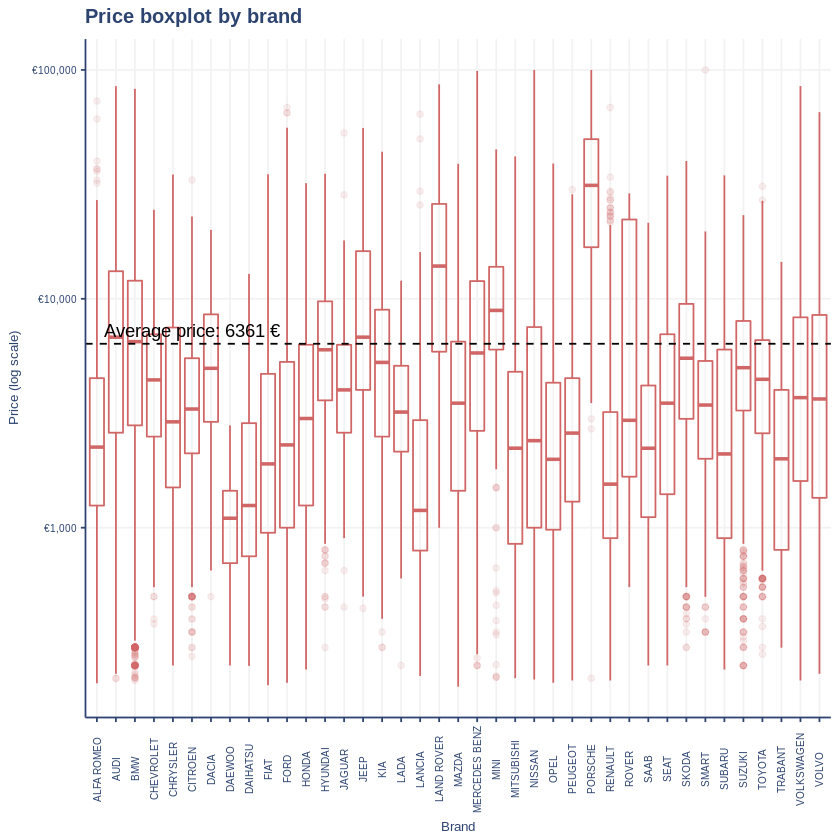

In [24]:
## Categorical variables
gBoxplot2 <- 
  ggplot(data = datasetCarsFinal,
                    mapping = aes(x = brand,
                                  y = price)) +
  geom_boxplot(alpha = 0.1, color = '#D16666') +
  geom_hline(yintercept = mean(datasetNumerical$price), linetype="dashed") +
  annotate(geom = 'text', x = 6, y = mean(datasetNumerical$price), label = paste0('Average price: ', sprintf('%4.0f €', round(mean(datasetNumerical$price), 0))), vjust = -.5) +
  labs(title = 'Price boxplot by brand', subtitle = NULL) +
  scale_x_discrete(name = 'Brand') +
  scale_y_log10(name = 'Price (log scale)', labels = scales::dollar_format(prefix = '€')) +
  
  themeCharts
gBoxplot2

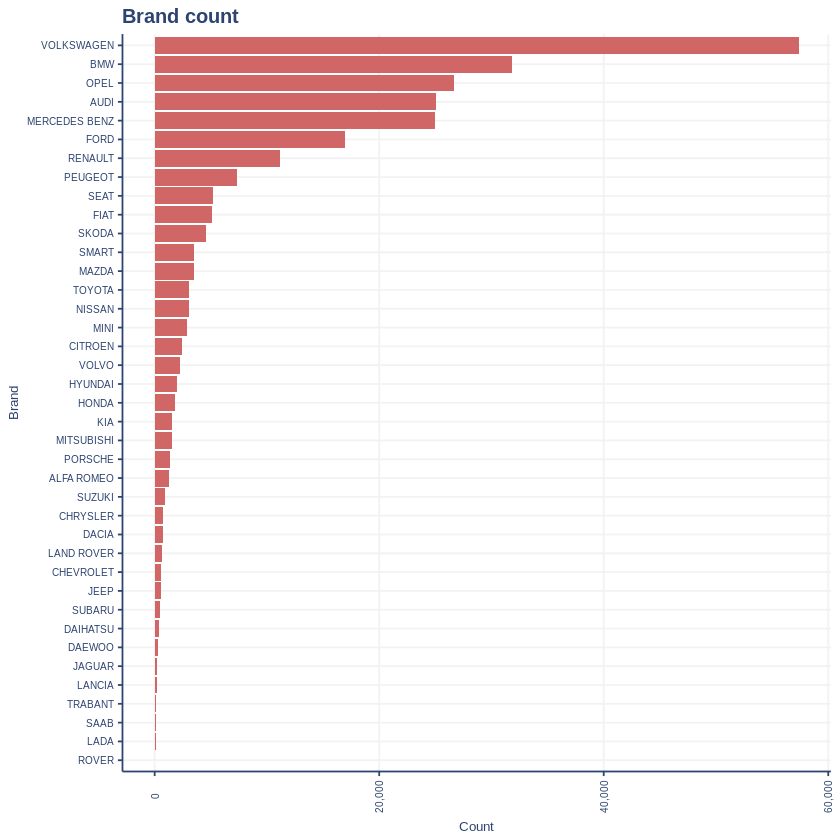

In [25]:
gCountBrand <- 
  ggplot(data = datasetCarsFinal[, .(N = .N), by = brand][order(-N)],
       mapping = aes(x = reorder(brand, N),
                     y = N)) +
  geom_col(fill = '#D16666') +
  coord_flip() +
  labs(title = 'Brand count', subtitle = NULL) +
  scale_x_discrete(name = 'Brand') +
  scale_y_continuous(name = 'Count', labels = comma) +
  themeCharts
gCountBrand

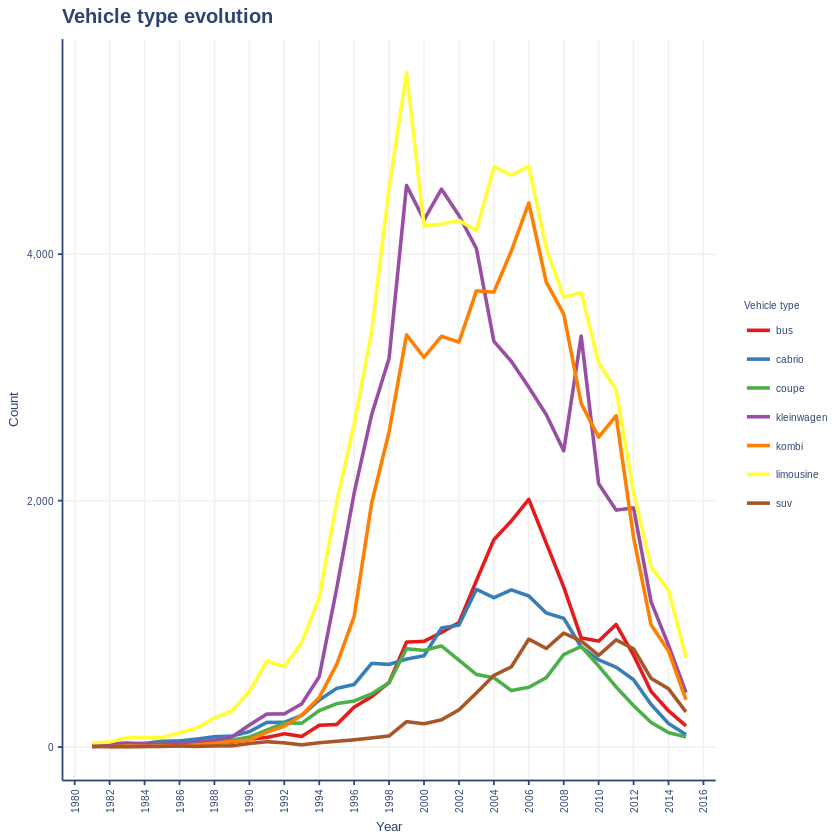

In [32]:
vehicleTypeEvol <- 
  ggplot(datasetCarsFinal[yearOfRegistration > 1980 & yearOfRegistration < 2016, .(N = .N), by =.(yearOfRegistration, vehicleType)],
         aes(x = yearOfRegistration,
             y = N,
             color = vehicleType)) +
  geom_line(size = 1) +
  scale_color_brewer(palette = 'Set1', name = 'Vehicle type') +
  scale_x_continuous(name = 'Year', breaks = seq(1980, 2020, by = 2)) +
  scale_y_continuous(name = 'Count', labels = comma) +
  labs(title = 'Vehicle type evolution', subtitle = NULL) +
  themeCharts
vehicleTypeEvol

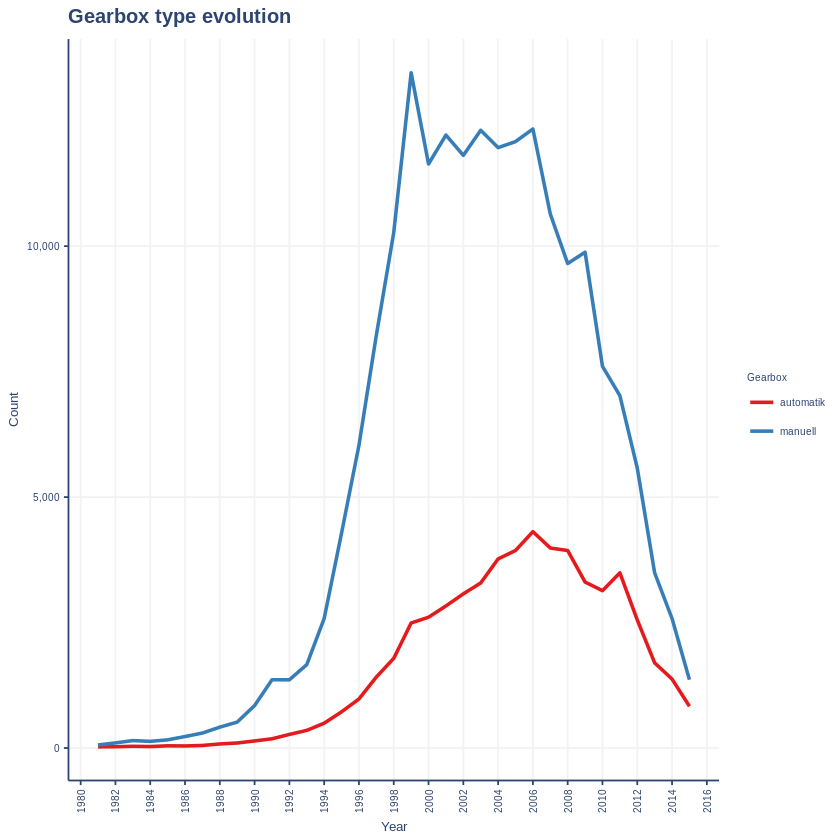

In [33]:
gearboxEvol <- 
  ggplot(datasetCarsFinal[yearOfRegistration > 1980 & yearOfRegistration < 2016, .(N = .N), by =.(yearOfRegistration, gearbox)],
         aes(x = yearOfRegistration,
             y = N,
             color = gearbox)) +
  geom_line(size = 1) +
  scale_color_brewer(palette = 'Set1', name = 'Gearbox') +
  scale_x_continuous(name = 'Year', breaks = seq(1980, 2020, by = 2)) +
  scale_y_continuous(name = 'Count', labels = comma) +
  labs(title = 'Gearbox type evolution', subtitle = NULL) +
  themeCharts
gearboxEvol

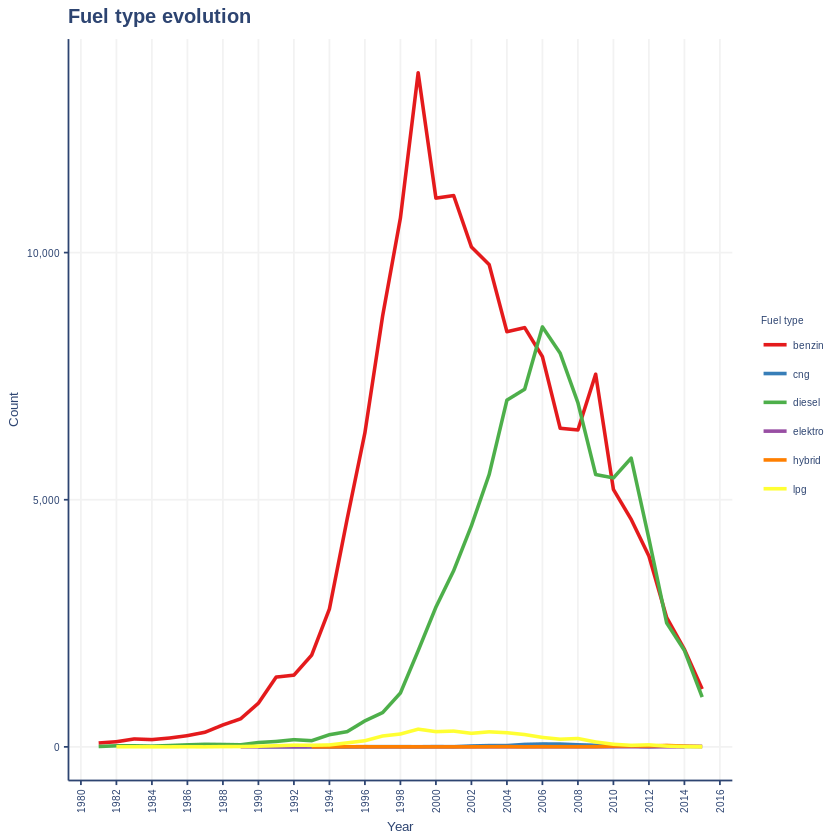

In [34]:
fuelTypeEvol <- 
  ggplot(datasetCarsFinal[yearOfRegistration > 1980 & yearOfRegistration < 2016, .(N = .N), by =.(yearOfRegistration, fuelType)],
         aes(x = yearOfRegistration,
             y = N,
             color = fuelType)) +
  geom_line(size = 1) +
  scale_color_brewer(palette = 'Set1', name = 'Fuel type') +
  scale_x_continuous(name = 'Year', breaks = seq(1980, 2020, by = 2)) +
  scale_y_continuous(name = 'Count', labels = comma) +
  labs(title = 'Fuel type evolution', subtitle = NULL) +
  themeCharts
fuelTypeEvol

### Treemap

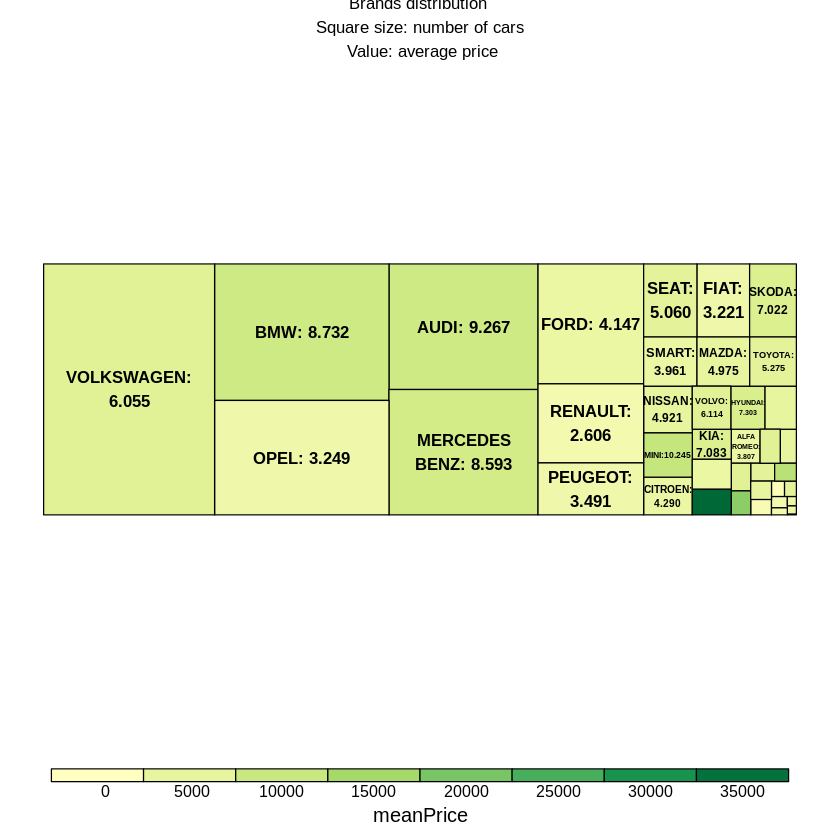

In [30]:
brandPrice <- datasetCarsFinal[, .(N = .N, meanPrice = mean(price)), by = brand]
brandPrice$label <- paste(brandPrice$brand, format(round(brandPrice$meanPrice, 0), big.mark = '.', decimal.mark = ','), sep = ':')
treeMapBrands <- 
  treemap(dtf = brandPrice,
        index = c('label'),
        vSize = 'N',
        vColor = 'meanPrice',
        type = 'value',
        fontsize.title = 10,
        fontsize.labels = 10,
        title = 'Brands distribution \n Square size: number of cars \n Value: average price',
        border.lwds = 1,
        aspRatio = 3)

## Mapping data

In [15]:
# Data for filling maps --------------------------------------------------------
avPriceLander <- datasetCarsFinal[, .(avPrice = mean(price)), by = state]
nCarsLander <- datasetCarsFinal[, .(N = .N), by = state]

In [16]:
# Manipulate shapefile to create a data frame with all necessary data ----------
mapDataFortifiedLander <- fortify(shapefileLander) %>% 
  mutate(id = as.numeric(id)) %>% 
  setDT()
dfLander <- data.frame(state = shapefileLander@data$GEN,
                      id = 0:20)

Regions defined for each Polygons


In [17]:
# Determining the centroid of every polygon
centroids <- as.data.frame(coordinates(shapefileLander)) %>% 
  rename(long = V1, lat = V2) %>% 
  mutate(id = seq(0, nrow(centroids) - 1)) %>% 
  left_join(., dfLander, by ='id') %>% 
  setDT()

ERROR: Error in mutate_impl(.data, dots): Evaluation error: objeto 'centroids' no encontrado.


In [18]:
mapDataMergedLander <- left_join(mapDataFortifiedLander, dfLander, by = 'id') %>% 
  left_join(., avPriceLander, by = 'state') %>% 
  left_join(., nCarsLander, by = 'state') %>%
  setDT()

In [19]:
notNecessaryIds <- c(14, 4, 11, 6, 13)

In [20]:
## Maps ------------------------------------------------------------------------
ggplot() +
  geom_path(data = mapDataMergedLander,
            mapping = aes(x = long, y = lat, group = group),
            color = 'black',
            size = .1) +
  geom_polygon(data = mapDataMergedLander,
               mapping = aes(x = long, y = lat, group = group, fill = avPrice)) +
  scale_fill_gradient(low = "white",
                      high = "#ff702f",
                      na.value = "grey",
                      space = "Lab",
                      name = 'Average \nprice') +
  geom_point(data = centroids[!(id %in% notNecessaryIds)],
             mapping = aes(x = long,
                           y = lat),
             colour ='#2D4471') +
  coord_map(projection = 'mercator') +
  geom_text(data = centroids[!(id %in% notNecessaryIds)],
            mapping = aes(x = long,
                          y = lat,
                          label = as.character(state)),
            size = 3,
            colour ='#2D4471',
            nudge_y = -0.15) +
  labs(title = 'Average price of cars on sale', subtitle = 'By Lander') +
  themeMaps

ERROR: Error in fortify(data): objeto 'centroids' no encontrado


In [21]:
ggplot() +
  geom_path(data = mapDataMergedLander,
            mapping = aes(x = long, y = lat, group = group),
            color = 'black',
            size = .1) +
  geom_polygon(data = mapDataMergedLander,
               mapping = aes(x = long, y = lat, group = group, fill = N)) +
  scale_fill_gradient(low = "white",
                      high = "#ff702f",
                      na.value = "grey",
                      space = "Lab",
                      name = 'Number \nof cars') +
  geom_point(data = centroids[!(id %in% notNecessaryIds)],
             mapping = aes(x = long,
                           y = lat),
             colour ='#2D4471') +
  coord_map(projection = 'mercator') +
  geom_text(data = centroids[!(id %in% notNecessaryIds)],
            mapping = aes(x = long,
                          y = lat,
                          label = as.character(state)),
            size = 3,
            colour ='#2D4471',
            nudge_y = -0.15) +
  labs(title = 'Number of cars on sale', subtitle = 'By Lander') +
  themeMaps


ERROR: Error in fortify(data): objeto 'centroids' no encontrado
